**Author:** Ronan Green  
**Model:** K-Nearest Neighbours (KNN)  
**Brief Description:**  
K-Nearest Neighbours is a supervised learning algorithm that classifies data points based on the majority class of their closest neighbours.

**Note:**  
This notebook was created by Ronan Green. A full breakdown of the findings, methodology, and references used can be found at the end of the notebook.

In [2]:
import pandas as pd

# Replace with the correct path if needed
df = pd.read_csv("name_gender_dataset.csv")
df.head()


,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


### **Explanation**

- **Reads the CSV** file into a Pandas DataFrame named `df`.
- **df.head()** displays the first few rows to confirm the data loaded correctly.
- The dataset contains columns: `Name`, `Gender`, `Count`, `Probability`.

In [3]:
print("DataFrame Shape:", df.shape)
df.info()
df.describe(include='all')


DataFrame Shape: (147269, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147269 entries, 0 to 147268
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Name         147269 non-null  object 
 1   Gender       147269 non-null  object 
 2   Count        147269 non-null  int64  
 3   Probability  147269 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.5+ MB


,Name,Gender,Count,Probability
count,147269,147269,1.472690e+05,1.472690e+05
unique,133910,2,NaN,NaN
top,Haynes,F,NaN,NaN
freq,2,89749,NaN,NaN
mean,NaN,NaN,2.481161e+03,6.790295e-06
std,NaN,NaN,4.645472e+04,1.271345e-04
min,NaN,NaN,1.000000e+00,2.736740e-09
25%,NaN,NaN,5.000000e+00,1.368370e-08
50%,NaN,NaN,1.700000e+01,4.652460e-08
75%,NaN,NaN,1.320000e+02,3.612500e-07


### **Explanation**

-  **DataFrame Shape**:
    - `df.shape` shows the number of rows and columns, helping gauge dataset size.
-  **df.info()**:
    - Provides a summary of each column, its data type, and non-null counts, revealing potential missing data.
-  **df.describe(include='all')**:
    - Gives descriptive statistics for numerical and object (string) columns, helping identify outliers or irregularities.

In [4]:
y = df["Gender"]

X = df[["Count", "Probability"]]

X.head()


,Count,Probability
0,5304407,0.014517
1,5260831,0.014398
2,4970386,0.013603
3,4579950,0.012534
4,4226608,0.011567


### **Explanation**

- **y = df["Gender"]**:
    - This extracts the target variable, which is `Gender` (M/F).
- **X = df[["Count", "Probability"]]**:
    - I select `Count` and `Probability` as our numeric features for KNN.

In [ ]:

y_encoded = y.map({'M': 1, 'F': 0})

print(y_encoded.value_counts())


Gender
0    89749
1    57520
Name: count, dtype: int64


### **Explanation**

- **y_encoded**:
    - KNN requires numeric labels, so we map 'M' to 1 and 'F' to 0.
- **value_counts()**:
    - Gives an overview of how many 'M' vs. 'F' entries there are, helping detect class imbalance.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.2, 
    random_state=42,
    stratify=y_encoded
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 117815
Test set size: 29454


### **Explanation**

- **train_test_split**:
    - Splits the dataset into 80% training and 20% testing sets.
- **stratify=y_encoded**:
    - Preserves the original proportion of M/F in both training and testing sets, important if the classes are imbalanced.
- **random_state=42**:
    - Ensures the same random split every time you run the code, making results reproducible.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training features shape:", X_train_scaled.shape)
print("Scaled test features shape:", X_test_scaled.shape)


Scaled training features shape: (117815, 2)
Scaled test features shape: (29454, 2)


### **Explanation**

- **StandardScaler**:
    - Computes the mean and standard deviation of each feature on the training set.
- **fit_transform** on X_train**:
    - Learns scaling parameters (mean, std) from the training data, then applies the transformation.
- **transform on X_test**:
    - Uses the same parameters from the training set to scale the test data, preventing data leakage.
- **Why Scale?**
    - KNN uses distance metrics (often Euclidean), so features with larger numeric ranges can dominate the distance calculation if not scaled.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='euclidean')

### **Explanation**

-  **KNeighborsClassifier**:
    - Initialises a KNN classifier with `n_neighbors=5`, meaning the model will look at the 5 closest data points in the training set to determine a new sample’s class.
-  **metric='euclidean'**:
    - Specifies the distance metric as Euclidean (L2 norm). Other options include Manhattan, Minkowski, etc.
-  **knn_model.fit**:
    - Trains the KNN model by simply storing the training data. KNN is a _lazy learner_; it doesn’t build an explicit model but rather uses the training set to make distance-based predictions.

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = knn_model.predict(X_test_scaled)

print("KNN Model Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


KNN Model Results:
Accuracy: 0.5536

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.76      0.68     17950
           1       0.38      0.23      0.28     11504

    accuracy                           0.55     29454
   macro avg       0.49      0.49      0.48     29454
weighted avg       0.52      0.55      0.52     29454

Confusion Matrix:
[[13715  4235]
 [ 8914  2590]]


### **Explanation**

1. **y_pred**:
    - Uses the trained KNN model to predict genders on the test set.
2. **accuracy_score**:
    - Overall percentage of correct predictions.
3. **classification_report**:
    - Shows precision, recall, and F1-score for both classes (M=1, F=0).
    - Particularly useful if there’s class imbalance or if one class is more important.
4. **confusion_matrix**:
    - Displays true positives, false positives, false negatives, and true negatives, providing deeper insight into how the model is classifying each class.

### **Results Explanation**

- **Accuracy: 55%**  
    The model correctly predicts the gender of around 55.36% of the names in the test set. This is only slightly better than random guessing (if the classes were evenly distributed), indicating that the model struggles to differentiate between male (1) and female (0) effectively.
    
- **Classification Report:**
    
    - **Class 0 (Female):**
        - **Precision: 0.61** – Out of all names predicted as female, 61% were actually female.
        - **Recall: 0.76** – Of all the female names in the test set, 76% were correctly identified.
        - **F1-Score: 0.68** – A balance of precision and recall, showing moderate performance for the female class.
    - **Class 1 (Male):**
        - **Precision: 0.38** – Out of all names predicted as male, only 38% were truly male.
        - **Recall: 0.23** – Of all the male names in the test set, only 23% were correctly identified.
        - **F1-Score: 0.28** – Indicates weak performance for the male class, largely due to the low recall.

    **Confusion Matrix:**

    - **Top-left (True Female, Predicted Female = 13715):** Correctly identified female names.
        
    - **Top-right (True Female, Predicted Male = 4235):** Female names incorrectly classified as male.

    - **Bottom-left (True Male, Predicted Female = 8914):** Male names incorrectly classified as female (high false negatives).

    - **Bottom-right (True Male, Predicted Male = 2590):** Correctly identified male names.

#### **Interpretation**

- The model **performs noticeably better** on predicting female names (class 0) than male names (class 1), as shown by the higher recall (0.76 vs. 0.23).
- This **imbalance in performance** suggests that the model may be **biased towards predicting 'Female'**. The large number of false negatives (8914) for class 1 leads to poor recall for male names.


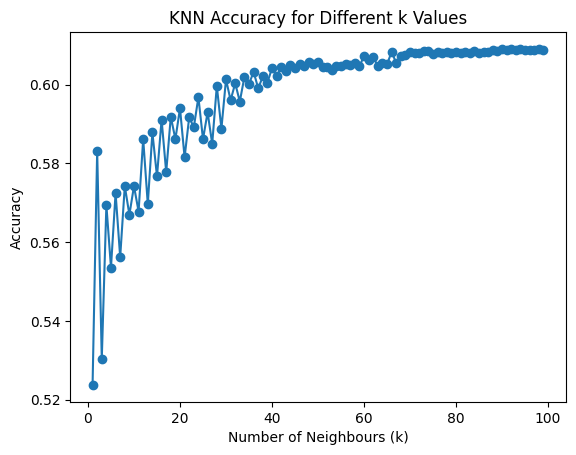

In [25]:
import matplotlib.pyplot as plt

k_values = range(1, 100)
scores = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_temp.fit(X_train_scaled, y_train)
    y_temp_pred = knn_temp.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_temp_pred))

plt.plot(k_values, scores, marker='o')
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("Number of Neighbours (k)")
plt.ylabel("Accuracy")
plt.show()


### **Code Explanation**

1. **Import and Setup:**
    - The code begins by importing `matplotlib.pyplot` for plotting.
    - A range of k-values from 1 to 100 is defined with `k_values = range(1, 100)`, and an empty list `scores` is created to store the accuracy for each k.
2. **Iterative Model Training and Evaluation:**
    - For each value of k in `k_values`, a temporary KNN classifier (`knn_temp`) is initialised using Euclidean distance.
    - The model is trained on the scaled training data (`X_train_scaled` and `y_train`).
    - Predictions are then made on the scaled test set (`X_test_scaled`), and the accuracy score is computed using `accuracy_score`.
    - Each computed accuracy score is appended to the `scores` list.
3. **Plotting the Results:**
    - The accuracy scores are plotted against the corresponding k values using a line plot with markers.
    - The plot is titled "KNN Accuracy for Different k Values", with axes labels for the number of neighbours and accuracy.

### **Results Explanation**

- **Observed Trend:**
    - At **k = 1**, the accuracy is around **53%**.
    - For **k = 2**, there is a noticeable improvement to just over **58%**, but at **k = 3** it drops back to about **54%**.
    - After these initial changes, the accuracy begins to increase steadily. By **k = 20**, the accuracy is consistently over **58%**, reaching approximately **60%** at **k = 40**.
    - Beyond **k = 40**, the accuracy plateaus and does not significantly improve, reaching about **61%** at **k = 100**.
- **Interpretation:**
    - The initial changes suggest that a very low number of neighbours (k=1 or k=3) may result in a model that is too sensitive to noise or outliers, leading to lower accuracy.
    - As k increases, the model benefits from a more stable estimate, which improves accuracy up to a point.
    - Beyond a certain point (k=40), further increases in k do not show significant improvements and might even risk oversmoothing, where the model becomes less responsive to local structure in the data.
    - The overall performance plateau around **61% accuracy** indicates that while tuning k is important, there may be limitations in the model’s ability to capture the complexities of the data with the current feature set and preprocessing steps.

In [10]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Training Set Size after SMOTE: {X_train.shape[0]}")  # Size of the training set after applying SMOTE
print(f"Training Set Size after SMOTE: {X_train_smote.shape[0]}")



# Display class distributions
print("Class distribution before SMOTE:")
print(Counter(y_train))  # Original class distribution

print("\nClass distribution after SMOTE:")
print(Counter(y_train_smote))  # Resampled class distribution


knn_model.fit(X_train_smote, y_train_smote)


Training Set Size after SMOTE: 117815
Training Set Size after SMOTE: 143598
Class distribution before SMOTE:
Counter({0: 71799, 1: 46016})

Class distribution after SMOTE:
Counter({0: 71799, 1: 71799})


KNeighborsClassifier(metric='euclidean')

### **Code Explanation**

1. **Importing SMOTE and Counter:**
    - `from imblearn.over_sampling import SMOTE`: Imports SMOTE, which generates synthetic samples for the minority class.
    - `from collections import Counter`: Imports Counter to easily view the distribution of the target variable.
2. **Applying SMOTE:**
    - `smote = SMOTE(random_state=42)`: Initialises SMOTE with a fixed random state to ensure reproducibility.
    - `X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)`:
        - Applies SMOTE to the original training data (`X_train` and `y_train`).
        - This generates synthetic samples for the minority class until both classes have equal representation.
3. **Printing Training Set Sizes:**
    - The code prints the size of the original training set (`X_train.shape[0]`) and the resampled training set (`X_train_smote.shape[0]`).
    - **Result:**
        - Original training set size: **117815**
        - After SMOTE: **143598**
        - This increase reflects the addition of synthetic samples to balance the classes.
4. **Displaying Class Distributions:**
    - Before SMOTE:
        - `Counter(y_train)` outputs `Counter({0: 71799, 1: 46016})`, showing that class 0 has 71,799 samples and class 1 has 46,016 samples.
    - After SMOTE:
        - `Counter(y_train_smote)` outputs `Counter({0: 71799, 1: 71799})`, indicating that SMOTE has balanced the classes by augmenting the minority class (class 1) to match the majority (class 0).
5. **Fitting the Model on SMOTE Data:**
    - `knn_model.fit(X_train_smote, y_train_smote)`: Trains the KNN model on the resampled training data.
    - This ensures the model learns from a balanced dataset, which can help mitigate bias towards the majority class.

### **Result Explanation**
- **Training Set Size Increase:**
    - The original training set had 117,815 instances. After SMOTE, the size increased to 143,598 due to the addition of synthetic samples for the minority class.
- **Class Distribution:**
    - **Before SMOTE:** The data was imbalanced (0: 71,799 vs. 1: 46,016).
    - **After SMOTE:** Both classes are balanced with 71,799 samples each.
- **Model Training:**
    - Fitting the KNN model on this balanced dataset should help improve its ability to correctly classify the minority class, thereby potentially improving recall and overall performance.

In [17]:
y_pred = knn_model.predict(X_test_scaled)

print("KNN Model Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

C:\Users\ronan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNN Model Results:
Accuracy: 0.6004

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.96      0.74     17950
           1       0.40      0.04      0.08     11504

    accuracy                           0.60     29454
   macro avg       0.50      0.50      0.41     29454
weighted avg       0.53      0.60      0.48     29454

Confusion Matrix:
[[17180   770]
 [10999   505]]


### **Results Explanation**

**Overall Accuracy:**
- The KNN model achieves an overall accuracy of **0.6004** (or 60.04%). This means that 60.04% of the test set predictions are correct.

**Classification Report Breakdown:**

- **Class 0 (Female):**
    - **Precision:** 0.61
        - Of all instances predicted as female, 61% were actually female.
    - **Recall:** 0.96
        - The model correctly identified 96% of the actual female cases.
    - **F1-score:** 0.74
        - The harmonic mean of precision and recall, indicating a moderate balance between the two.
- **Class 1 (Male):**
    
    - **Precision:** 0.40
        - Only 40% of the instances predicted as male were truly male.
    - **Recall:** 0.04
        - The model correctly identified only 4% of the actual male cases—a very low figure.
    - **F1-score:** 0.08
        - This very low F1-score suggests that the model is performing poorly for the male class.

**Confusion Matrix Breakdown:**
- **Top Row (Actual Class 0 - Female):**
    - **17180:** True Negatives (correctly predicted as female).
    - **770:** False Positives (female instances incorrectly predicted as male).
- **Bottom Row (Actual Class 1 - Male):**
    - **10999:** False Negatives (male instances incorrectly predicted as female).
    - **505:** True Positives (correctly predicted as male).

**Interpretation:**
- The high recall (0.96) for class 0 indicates that the model is very good at recognising female names.
- However, the extremely low recall (0.04) for class 1 indicates that the model is failing to identify most of the male names.
- This imbalance in performance is reflected in the confusion matrix, where a large number of male instances (10,999) are misclassified as female.
- Although SMOTE balanced the training set, the test set remains imbalanced or exhibits different characteristics, and the model still struggles with classifying the minority class (male).
- Overall, while the overall accuracy is 60.04%, this metric is misleading given the poor performance on the male class. 

In [ ]:
k_values = range(1, 100)
scores = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_temp.fit(X_train_smote, y_train_smote)
    y_temp_pred = knn_temp.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_temp_pred))

plt.plot(k_values, scores, marker='o')
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("Number of Neighbours (k)")
plt.ylabel("Accuracy")
plt.show()

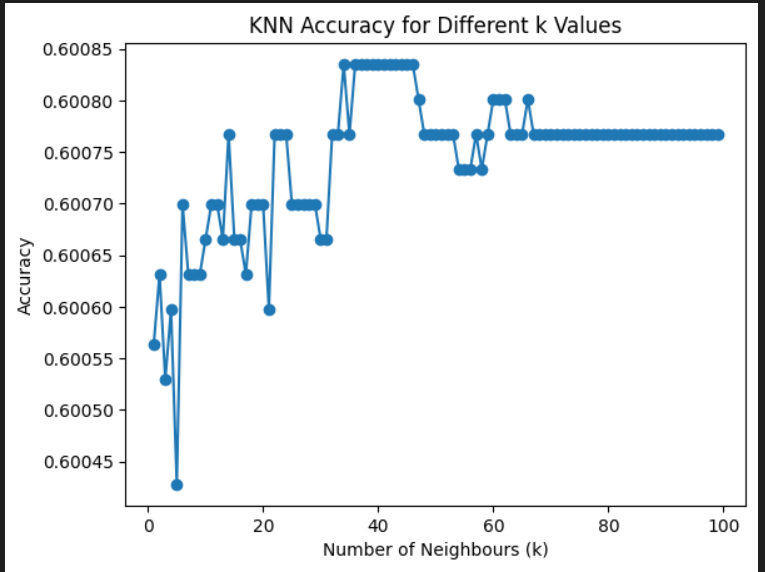

- **Observed Accuracy Range:**
    - The accuracy scores for all tested values of k are very similar, ranging between approximately **0.60045 and 0.60085**.
    - The changes in accuracy with different k values appear almost random, with no clear trend or optimum value emerging from the plot.
- **Interpretation:**
    - **Model Sensitivity:**  
        The minimal variation in accuracy suggests that, for this dataset with the current preprocessing and feature set, the model's performance is not very sensitive to the choice of k within this range.

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=63, metric='euclidean')
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

print("KNN Model Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


KNN Model Results:
Accuracy: 0.6048

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.98      0.75     17950
           1       0.37      0.02      0.03     11504

    accuracy                           0.60     29454
   macro avg       0.49      0.50      0.39     29454
weighted avg       0.52      0.60      0.47     29454

Confusion Matrix:
[[17613   337]
 [11304   200]]


### **Results Explanation**

- **Overall Accuracy:**
    
    - The model achieves an accuracy of **0.6048** (approximately 60.48%). This is slightly better than a random baseline but still indicates that the model is struggling overall.
- **Classification Report Breakdown:**
    
    **For Class 0 (Female):**
    
    - **Precision:** 0.61
        - This means that when the model predicts a name is female, it is correct 61% of the time.
    - **Recall:** 0.98
        - The model correctly identifies 98% of all actual female instances.
    - **F1-Score:** 0.75
        - The balance between precision and recall is moderate.
    
    **For Class 1 (Male):**
    
    - **Precision:** 0.37
        - When the model predicts a name as male, only 37% of those predictions are correct.
    - **Recall:** 0.02
        - The model only correctly identifies 2% of the actual male names—a very low performance.
    - **F1-Score:** 0.03
        - The harmonic mean of precision and recall is extremely low, indicating poor predictive capability for the male class.
- **Confusion Matrix Breakdown:**
    - **Top Row (Actual Female):**
        - **17,613:** Correctly predicted as female.
        - **337:** Female instances incorrectly predicted as male.
    - **Bottom Row (Actual Male):**
        - **11,304:** Male instances incorrectly predicted as female.
        - **200:** Correctly predicted as male.
- **Interpretation:**
    - The model is highly biased towards predicting class 0 (female).
    - Although it correctly identifies almost all female names (recall = 0.98), it fails to recognise male names, with a recall of only 0.02.
    - The high number of false negatives for the male class (11,304 cases misclassified as female) indicates that the model does not perform well for class 1.
    - The slight overall improvement in accuracy with k=63 does not translate to balanced performance across the classes.

In [11]:


# Initialise the KNN classifier with distance weighting
knn_weighted = KNeighborsClassifier(n_neighbors=63, metric='euclidean', weights='distance')
knn_weighted.fit(X_train_smote, y_train_smote)

# Predict on the scaled test set
y_pred_weighted = knn_weighted.predict(X_test_scaled)

print("Weighted KNN Model Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_weighted):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_weighted))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_weighted))

C:\Users\ronan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Weighted KNN Model Results:
Accuracy: 0.6008

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.96      0.75     17950
           1       0.40      0.04      0.08     11504

    accuracy                           0.60     29454
   macro avg       0.50      0.50      0.41     29454
weighted avg       0.53      0.60      0.48     29454

Confusion Matrix:
[[17214   736]
 [11023   481]]


### **Explanation:**

- **Model Initialisation:**
    - We create a new KNN classifier (`knn_weighted`) with the same number of neighbours (63) and Euclidean distance, but add `weights='distance'`.
    - This setting means that nearer neighbours contribute more heavily to the vote, which can help to improve the classification of the minority class by reducing the influence of distant, potentially noisy points.
- **Fitting and Prediction:**
    - The model is trained on the SMOTE-resampled training data (`X_train_smote`, `y_train_smote`).
    - Predictions are then made on the scaled test set (`X_test_scaled`).
- **Evaluation:**
    - The overall accuracy, detailed classification report, and confusion matrix are printed to evaluate if distance weighting has improved performance on the minority class.

### **Interpretation:**  
Despite applying distance weighting (`weights='distance'`), the model’s performance on the male class (class 1) remains critically low. The weighted KNN still shows:

- A very high recall for female names (0.96) but a dismally low recall for male names (0.04).
- The overall accuracy does not improve significantly, staying around 60%.

This indicates that the adjustments made by distance weighting are insufficient to overcome the imbalance in predictions. The minority class (male) continues to be vastly under-predicted, resulting in a high number of false negatives.

In [12]:
# Initialise the KNN classifier with distance weighting
knn_weighted = KNeighborsClassifier(n_neighbors=63, metric='euclidean', weights='distance')
knn_weighted.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred_weighted = knn_weighted.predict(X_test_scaled)

print("Weighted KNN Model Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_weighted):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_weighted))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_weighted))

Weighted KNN Model Results:
Accuracy: 0.5967

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.95      0.74     17950
           1       0.37      0.05      0.08     11504

    accuracy                           0.60     29454
   macro avg       0.49      0.50      0.41     29454
weighted avg       0.52      0.60      0.48     29454

Confusion Matrix:
[[17034   916]
 [10963   541]]


### **Interpretation:**
- The classifier is trained on the scaled training data (`X_train_scaled` and `y_train`).
- The model still demonstrates a strong bias towards predicting the female class, as evidenced by the very high recall (0.95) for class 0.
- In contrast, the male class (class 1) has a very low recall (0.05), meaning almost all male instances are misclassified as female.
- Overall, the weighted KNN model does not significantly improve the prediction of the male class, and the imbalance in performance between the two classes persists.

## **Data Sources**

- **[UCI Machine Learning Repository - Gender by Name Dataset](https://archive.ics.uci.edu/dataset/591/gender+by+name)**
    
    - This dataset contains **147,270 instances** with **4 features**.
    - Features include **first names, gender, count, and probability**.
    - The target variable (gender) is divided into two classes:
        - **M** (male)
        - **F** (female)
    - The dataset aggregates raw counts for first/given names from government data sources in the US, UK, Canada, and Australia and calculates the probability of a name being assigned a particular gender.
    - It is designed for tasks such as **classification** and **clustering** in the social sciences.

---

## **Pre-Processing**

- **Data Loading and Inspection:**
    - The dataset was loaded using Pandas(`pd.read_csv`) and inspected with methods like `df.head()`, `df.info()`, and `df.describe(include='all')` to understand its structure and summary statistics.
- **Target and Feature Selection:**
    - The target variable (`Gender`) was extracted and mapped to numerical values (M = 1 and F = 0).
    - The features selected were `Count` and `Probability`, which are both numerical.
- **Data Splitting:**
    - The dataset was split into training and testing sets using `train_test_split` with stratification on the target to preserve class proportions.
- **Feature Scaling:**
    - Numerical features were standardised using `StandardScaler` to ensure that distance calculations in KNN are not dominated by differences in scale.
- **Addressing Class Imbalance:**
    - In some experiments, SMOTE (Synthetic Minority Over-sampling Technique) was applied on the training data to balance the class distribution.

---

## **Data Understanding & Visualization**

- **Exploratory Data Analysis:**
    - The shape, basic statistics, and data types were examined to understand the dataset’s composition.
    - The distribution of the target variable was checked (using `value_counts()`) to assess class imbalance.
- **Visualisation:**
    - Plots of accuracy versus different k-values were generated to determine the optimal number of neighbours for the KNN model.

---

## **Algorithms**

- **K-Nearest Neighbour (KNN) for Classification:**
    - KNN is a supervised, instance-based learning algorithm that classifies a new sample based on the majority vote of its k-nearest neighbours in the feature space.
    - It utilises distance metrics (Euclidean distance for this notebook), making the standardisation of features important.

---

## **Model Training & Evaluation**

- **Basic KNN:**
    - **Training:**  
        The unsmoted version of the data was used to train a KNN classifier (initially with k = 5). The model was trained on the standardised training set.
    - **Evaluation:**  
        Evaluation metrics such as accuracy, precision, recall, F1-score, and the confusion matrix were computed on the test set. These metrics indicated an overall accuracy of around 55%, but with a pronounced bias toward one class. This provided a baseline for model performance and highlighted issues with class imbalance.
- **Tuning the Number of Neighbours:**
    - **Training:**  
        A loop was executed to evaluate KNN models for k-values ranging from 1 to 100 using the unsmoted data. For each value of k, the model was trained on the scaled training set.
    - **Evaluation:**  
        The resulting accuracy scores were plotted against k, revealing that accuracy varied only slightly (around 60%). This step confirmed that simply adjusting the number of neighbours did not significantly improve overall performance or mitigate class bias.
- **Addressing Class Imbalance with SMOTE:**
    - **Training:**  
        SMOTE was applied to the training set, increasing its size and balancing the class distribution (from an original imbalance of approximately 71,799 females vs. 46,016 males to a balanced distribution of 71,799 each). A KNN model was retrained on this SMOTE-resampled data.
    - **Evaluation:**  
        The model was then evaluated on the original scaled test set. Although overall accuracy saw a modest improvement (around 60%), the evaluation revealed that the model still struggled with classifying the minority class correctly, with extremely low recall for that class.
- **Optimisation and Weighted KNN:**
    - **Training:**  
        Further experiments involved selecting an optimal number of neighbours (e.g. k = 63 based on previous tuning) and applying distance weighting (`weights='distance'`) to reduce the influence of distant neighbours. These adjustments were intended to improve local decision-making, particularly for the minority class.
    - **Evaluation:**  
        Despite these efforts, the final evaluation on the test set showed an overall accuracy of approximately 60% with a strong bias toward predicting the majority class. The recall for the minority class remained extremely low, indicating that even with oversampling and distance weighting, the model failed to recognise the minority class adequately. This comprehensive evaluation at each step underscores the need for further feature engineering or alternative methods to better address class imbalance.
---

## **Online Resources & Sources**

- **[W3Schools - Python ML KNN](https://www.w3schools.com/python/python_ml_knn.asp)**
    
    - A helpful resource for learning the fundamentals of K-Nearest Neighbour algorithms.
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html**
    
    - Scikit-Learn KNN Documentation
        
    - Provides detailed descriptions of KNN, its parameters, and usage examples.
        

---

## **Tools & Technologies Used**

- **Python Libraries:**
    - `Pandas` and `NumPy` for data handling and numerical computations.
    - `Scikit-Learn` for implementing KNN, performing data splitting, scaling, and model evaluation.
    - `Imbalanced-Learn (imblearn)` for applying SMOTE to address class imbalance.
    - `Matplotlib` for visualisation.
- **Development Environment:**
    - **Jupyter Notebook** was used for interactive code development, analysis, and visualisation.

---

## **Challenges Faced**

1. **Class Imbalance:**
    - The dataset showed a significant imbalance, with female names outnumbering male names.
    - Even after applying SMOTE and distance weighting, the model struggled to correctly classify the minority (male) class.
2. **Feature Limitations:**
    - Using only `Count` and `Probability` may not fully capture the nuances inherent in a name.
    - Further feature engineering (e.g. textual analysis of the `Name` field) might be necessary to improve discrimination between genders.
3. **Parameter Sensitivity:**
    - KNN performance was highly sensitive to the choice of k. Although tuning produced a narrow range of accuracy values (around 60%), the improvements did not translate into balanced class performance.
4. **Model Bias:**
    - The KNN models consistently showed a strong bias towards predicting female names, resulting in very low recall for male names, which highlights the need for additional strategies to handle imbalance effectively.

---

## **Conclusion**

The Gender by Name dataset provides a valuable opportunity to explore both classification and clustering tasks. Our experiments with the K-Nearest Neighbour algorithm involved:

- Extensive pre-processing (including encoding, scaling, and addressing class imbalance via SMOTE).
- Hyperparameter tuning for the number of neighbours and the implementation of distance weighting.
- Despite optimising these factors, the final models achieved an overall accuracy of around 60%, yet they exhibited a marked bias toward predicting female names with extremely low recall for male names.
